## 딥러닝

#### 인공신경망

#### Tensorflow
- https://www.tensorflow.org/?hl=ko
- 딥러닝 라이브러리 중 가장 유명한 
- 구글 브레인팀에서 개발

#### PyTorch
- https://pytorch.org/
- https://pytorch.kr/
- 메타(페이스북)에서 개발한 딥러닝 라이브러리
- GPU 사용이 매우 용이해서 빨리 처리가능

#### MNIST 데이터
- AI에서 많이 사용하는 데이터셋 중 하나
- 미국 국립표준연구소에서 배포하는 이미지 데이터
- 손글씨(0~9), 붓꽃데이터, 패션데이터 등 존재

#### Fashion MNIST

In [71]:
# 텐서플로 사용
from tensorflow import keras

In [72]:
# 패션MNIST를 로드하면서 훈련세트와 테스트세트로 분리
# skelarn train_test_split()와 변수 배치가 다름!
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [73]:
# 60000개 이미지 데이터, 넓이 28픽셀, 높이 28픽셀
train_input.shape

(60000, 28, 28)

In [74]:
# 60000개 이미지에 대한 분류값
train_target.shape

(60000,)

In [75]:
test_input.shape

(10000, 28, 28)

#### 이미지 시각화

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
# 한글로 Matplotlib 사용시 항상 필요!
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 맑은고딕체로 변경
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

# 시본 형태로 차트 변경
sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

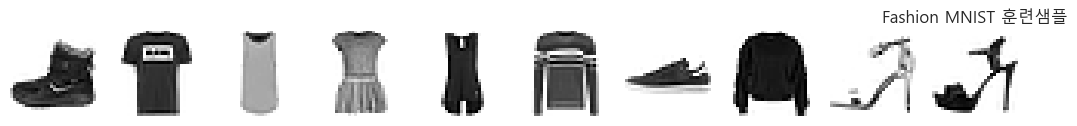

In [78]:
# 10개의 차트 그리기
fig, axes = plt.subplots(1, 10, figsize=(13, 2))
for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray_r')
    axes[i].axis('off')
    
plt.title('Fashion MNIST 훈련샘플')
plt.show()

- 이미지는 픽셀당 흑백은 1byte, 컬러는 3~4byte를 사용
- 해상도가 커지면 이미지 파일은 사이즈가 기하급수적으로 증가
- 28x28 정도로 제한

In [79]:
# 각 이미지의 분류값
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

|레이블|0|1|2|3|4|5|6|7|8|9|
|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
|패션MNIST|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵블 부츠|

In [80]:
# 60000개 데이터에서 각 레이블별 6000개씩 이미지가 존재재
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

#### 사이킷런 머신러닝, 로지스틱회귀로 아이템 분류

In [81]:
# 사이킷런 모듈 로드
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split    # 이거 필요없음

##### 이미지처리
- 28x28 2차원 배열을 784 1차원 배열로 변경해줘야 함

    <img src="../image/ml0009.png" width="600">

In [82]:
# 2D 이미지를 1D 벡터(1차원 배열)로 펼치기
train_input = train_input.reshape(-1, 28*28).shape

In [83]:
train_input

(60000, 784)

In [84]:
test_input = test_input.reshape(-1, 28*28)
test_input.shape

(10000, 784)

In [92]:
# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

# 정규화
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [93]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)  # 모델 학습

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [ ]:
# 훈련
lr.fit(train_scaled, train_target)

NameError: name 'lr' is not defined

- 60000건 훈련하는데 1분 40초 소요

In [ ]:
lr.score(train_scaled, train_target)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
# 정확도
lr.score(test_scaled, test_target)
# 예측 
pred_result = lr.predict(test_scaled)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
# 전처리 이전의 원본 데이터를 따로 저장
X_train_raw = train_input
X_test_raw = test_input

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train_raw.astype(np.float64))
test_scaled = scaler.transform(X_test_raw.astype(np.float64))

In [ ]:
print(test_input.shape)
print(test_input[0])

(9, 2)
[ 35. 720.]


In [94]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    plt.title(f'실제: {test_target[index]}, 예측: {pred_result[index]}')
    plt.axis('off')
    plt.show()

In [95]:
for i in range(11, 17):
    show_image(i)

IndexError: index 11 is out of bounds for axis 0 with size 9

<Figure size 200x200 with 0 Axes>

- 여기까지 머신러닝으로 처리

#### 인공신경망

- 인간의 뇌속 뉴런과 유사한 구조로 인공지능
- 인공신경망을 이용해서 머신러닝 훈련과 테스트, 예측 등을 수행하는 것
- 인공지능 ⊃ 머신러닝 ⊃ 딥러닝(인공신경망)
- 정확도가 높아서 딥러닝 가장 많이 사용 - 트렌드

<img src="../image/ml0010.png" width="700">

In [96]:
# 텐서플로 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# train_test_split() 함수로 기존 훈련세트를 훈련세트: 검증세트 8:2로 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [99]:
train_scaled.shape

(20, 2)

- 기존훈련세트 -> 60000
- 새 훈련세트 -> 48000
- 검증세트 -> 12000